In [1]:
!pip install catboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
import warnings
warnings.simplefilter('ignore')

In [3]:
try:
    train = pd.read_csv(r'C:\Users\0727G\Desktop\Projects\Heart_desease\train.csv')
    test = pd.read_csv(r'C:\Users\0727G\Desktop\Projects\Heart_desease\test.csv')
    sample_submission = pd.read_csv(r'C:\Users\0727G\Desktop\Projects\Heart_desease\sample_submission.csv')
except:
    print('Save data and try to start at your computer')

In [4]:
display(train, test, sample_submission)

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          5  18888       1     154    85.0    130     80            1     1   
1          6  19042       2     170    69.0    130     90            1     1   
2          7  20432       1     160    70.0    120     75            1     1   
3         10  18133       2     185    94.0    130     90            1     1   
4         11  16093       2     170    76.0    120     80            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
29995  99984  21722       2     170   103.0    150     90            1     1   
29996  99987  18309       1     172    78.0    110     70            1     1   
29997  99989  21247       2     169    61.0    120     80            1     1   
29998  99994  14509       2     175    80.0    120     80            2     1   
29999  99997  16035       2     176    75.0    120     80            3     1   

       smoke  alco  active  
0          0     0       1  
1          0     0       1  
2          0     0       0  
3          0     0       1  
4          0     0       1  
...      ...   ...     ...  
29995      0     1       0  
29996      0     0       1  
29997      0     0       0  
29998      0     0       0  
29999      0     0       1  

[30000 rows x 12 columns]

id  cardio
0          5     0.0
1          6     0.0
2          7     0.0
3         10     0.0
4         11     0.0
...      ...     ...
29995  99984     0.0
29996  99987     0.0
29997  99989     0.0
29998  99994     0.0
29999  99997     0.0

[30000 rows x 2 columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30000 non-null  int64  
 1   age          30000 non-null  int64  
 2   gender       30000 non-null  int64  
 3   height       30000 non-null  int64  
 4   weight       30000 non-null  float64
 5   ap_hi        30000 non-null  int64  
 6   ap_lo        30000 non-null  int64  
 7   cholesterol  30000 non-null  int64  
 8   gluc         30000 non-null  int64  
 9   smoke        30000 non-null  int64  
 10  alco         30000 non-null  int64  
 11  active       30000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.7 MB


In [7]:
ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
ProfileReport(test)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
train['id'].nunique()

70000

In [8]:
test['id'].nunique()

30000

Пропусков в данных нет, дубликатов в id тоже. Есть аномалии в следующих столбцах: рост, вес, давление. Также из особенностей: возраст записан в днях, однако мы это оставим: для моделей дерева, леса и логистической так лучше, выше точность.

In [9]:
train['height'].describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

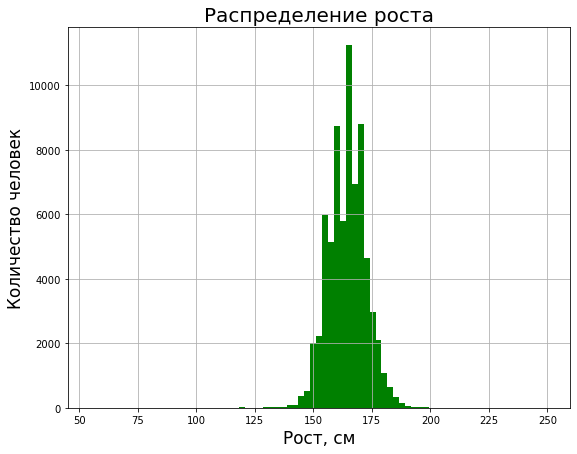

In [10]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.hist(train['height'], bins=77, color='g')
ax.set_title('Распределение роста', fontdict = {'fontsize': 20})
ax.set_xlabel('Рост, см', fontdict = {'fontsize': 17})
ax.set_ylabel('Количество человек', fontdict = {'fontsize': 17})
ax.grid()
plt.show()

In [11]:
display(train.loc[train['height'] > 200]) # Рост самого высокого человека 251 см, так что, возмжно это реальный рост, один из 70.000

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
6486    9223  21220       1     250    86.0    140    100            3     1   
21628  30894  19054       2     207    78.0    100     70            1     1   

       smoke  alco  active  cardio  
6486       0     0       1       1  
21628      0     1       1       0

In [12]:
display(test.loc[test['height'] > 195])

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
3807   12750  20487       1     198    80.0    120     80            3     3   
12424  41404  15169       2     197    88.0    110     70            1     1   
15712  52339  17570       1     196    79.0    100     70            1     1   
27443  91683  19680       2     197    78.0    120     80            1     1   

       smoke  alco  active  
3807       0     0       0  
12424      0     0       1  
15712      0     0       0  
27443      0     0       1

In [13]:
display(train.loc[train['height'] < 100]) # Заменим значения меньше 100 на 100 + значение.

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
224      309  21800       2      76    55.0    120     80            1     1   
7598   10843  14661       2      70    72.0    120      8            1     1   
8171   11662  17646       2      97   170.0    160    100            1     1   
12770  18218  19594       1      75   168.0    120     80            1     1   
13265  18928  22456       2      71    68.0    120     80            3     1   
14323  20459  22005       1      67    57.0    120     90            1     1   
15167  21686  15812       1      70    68.0    120     80            1     1   
16699  23859  19680       2      74    98.0    140     90            1     1   
17277  24690  17530       1      98    45.0     12     80            1     1   
22542  32207  14538       1      68    65.0    100     60            1     1   
22723  32456  23386       1      55    81.0    130     90            1     1   
23913  34186  19074       1      81   156.0    140     90            1     1   
27384  39156  15292       1      80   178.0    140     90            3     3   
27603  39462  20978       1      64    61.0    130     70            1     1   
28737  41075  19747       1      91    55.0    140     90            1     1   
29157  41661  19088       1      60    69.0    110     70            1     1   
32098  45832  15374       1      72    74.0    150     90            1     1   
33607  48009  19709       2      65    72.0    130     80            1     1   
44490  63545  19120       1      65    60.0    120     80            1     1   
46319  66161  21006       2      68    71.0    120     80            1     1   
47352  67631  23297       1      75    75.0    120     80            1     1   
50789  72476  14499       2      67    60.0    110     80            1     1   
51459  73386  15432       2      70    69.0    120     80            1     1   
53344  76116  20541       2      67    80.0    120     80            1     1   
56022  79917  21171       1      96    59.0     90     60            1     1   
64115  91523  18426       1      59    57.6    125     67            1     1   
64454  92008  21348       1      66    63.0     12     80            1     1   
65302  93223  18467       1      99    60.0     90     60            1     1   
66643  95141  18830       1      57    61.0    130     90            1     1   

       smoke  alco  active  cardio  
224        0     0       1       0  
7598       0     0       1       0  
8171       1     0       1       1  
12770      1     0       1       1  
13265      0     0       1       0  
14323      0     0       1       1  
15167      0     0       0       0  
16699      0     0       1       1  
17277      0     0       1       0  
22542      0     0       0       0  
22723      0     0       1       1  
23913      0     0       1       0  
27384      0     0       1       1  
27603      0     0       1       0  
28737      0     0       1       1  
29157      0     0       0       0  
32098      0     0       1       1  
33607      0     0       0       0  
44490      0     0       1       0  
46319      0     0       1       0  
47352      0     0       1       0  
50789      1     1       1       0  
51459      0     0       0       0  
53344      0     0       0       1  
56022      0     0       1       1  
64115      0     0       0       0  
64454      0     0       0       1  
65302      0     0       1       0  
66643      0     0       1       1

In [14]:
display(test.loc[test['height'] < 100])

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
730     2495  21771       1      58   183.0    160   1000            1     2   
1114    3828  14653       2      65    74.0    120     40            2     1   
7689   25602  23309       1      68    66.0    130     80            2     1   
9102   30346  20738       2      72    70.0    120     80            1     1   
13262  44220  18995       1      50    41.0    120     80            1     1   
13495  45047  17642       1      62    58.0    120     80            1     1   
15109  50367  22671       1      60   155.0    160    100            1     1   
18312  61030  18899       2      87   173.0    140     80            1     1   
18437  61459  18729       1      65    63.0    140     90            1     1   
19504  65020  22855       1      52    78.0    120     80            1     1   
24928  83304  21184       1      56    63.0    110     70            1     3   
29020  96815  19846       1      52    60.0    110     70            1     1   

       smoke  alco  active  
730        0     0       1  
1114       1     0       1  
7689       0     0       1  
9102       1     0       1  
13262      0     0       1  
13495      0     0       0  
15109      0     0       1  
18312      0     0       1  
18437      0     0       1  
19504      0     0       1  
24928      0     0       1  
29020      0     0       1

In [15]:
train['height'].describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [16]:
train.loc[train['height'] < 100, 'height'] = train.loc[train['height'] < 100, 'height'] + 100

In [17]:
test.loc[test['height'] < 90, 'height'] = test.loc[test['height'] < 90, 'height'] + 100

In [18]:
display(train.loc[train['height'] < 90, 'height'])
display(test.loc[test['height'] < 90])

Series([], Name: height, dtype: int64)

Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active]
Index: []

Заменим значения веса меньше 30 кг на занчения 100 + значение.

In [19]:
train['weight'].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

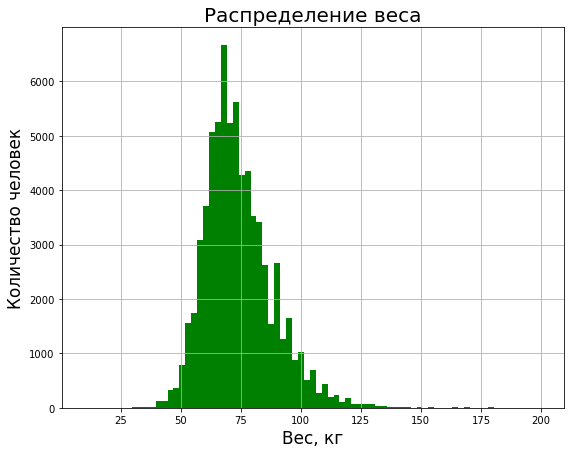

In [20]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.hist(train['weight'], bins=77, color='g')
ax.set_title('Распределение веса', fontdict = {'fontsize': 20})
ax.set_xlabel('Вес, кг', fontdict = {'fontsize': 17})
ax.set_ylabel('Количество человек', fontdict = {'fontsize': 17})
ax.grid()
plt.show()

In [21]:
train.loc[train['weight'] < 30, 'weight'] = 100 + train.loc[train['weight'] < 30, 'weight']

In [22]:
test.loc[test['weight'] < 30, 'weight'] = 100 + test.loc[test['weight'] < 30, 'weight']

In [23]:
display(train.loc[train['weight'] < 30, 'weight'], test.loc[test['weight'] < 30, 'weight'])

Series([], Name: weight, dtype: float64)

Series([], Name: weight, dtype: float64)

Давление

In [24]:
display(train.loc[train['ap_lo'] < 1])

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
2014    2845  22712       2     167    59.0    906      0            1     1   
13489  19258  14965       2     150    60.0    130      0            1     1   
16459  23512  20457       1     156    50.0    138      0            3     1   
17381  24837  18226       1     164    78.0    138      0            1     1   
22923  32749  21182       2     166    68.0    149      0            1     1   
23867  34120  16131       1     161    92.0    906      0            2     1   
25454  36325  17952       2     176    73.0     12      0            1     1   
27686  39577  23396       2     180    73.0    140      0            1     1   
31783  45400  16070       1     170    64.0    907      0            1     1   
38370  54780  23208       2     170    81.0    148      0            1     1   
40330  57646  20322       1     162    50.0    309      0            1     1   
41505  59301  20970       1     154    41.0    806      0            1     1   
42397  60565  17988       2     176    69.0    906      0            1     1   
43922  62754  18802       1     164    78.0    108      0            2     1   
45835  65470  19597       2     165    70.0    140      0            3     1   
48049  68612  19012       1     160    84.0    121      0            1     1   
52580  75007  21919       1     155    66.0     13      0            1     1   
56950  81298  15268       1     164    70.0    120      0            1     1   
60106  85816  22571       1     167    74.0     15    -70            1     1   
63787  91073  14722       2     161    61.0    117      0            1     1   
65303  93224  23612       2     176    99.0    120      0            1     3   
68663  98095  18190       1     156    41.0    906      0            1     1   

       smoke  alco  active  cardio  
2014       0     0       1       0  
13489      0     0       0       0  
16459      0     0       1       1  
17381      0     0       1       0  
22923      0     0       1       1  
23867      0     0       1       1  
25454      0     0       1       0  
27686      1     1       1       1  
31783      0     0       1       0  
38370      0     0       1       0  
40330      0     0       1       0  
41505      0     0       1       0  
42397      0     0       1       0  
43922      0     0       1       0  
45835      1     0       1       0  
48049      0     0       0       1  
52580      0     0       1       0  
56950      0     0       1       0  
60106      0     0       1       1  
63787      0     0       1       0  
65303      0     0       1       1  
68663      0     0       1       0

In [25]:
display(train.loc[train['ap_hi'] < 1])

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
4607    6525  15281       1     165    78.0   -100     80            2     1   
16021  22881  22108       2     161    90.0   -115     70            1     1   
20536  29313  15581       1     153    54.0   -100     70            1     1   
23988  34295  18301       1     162    74.0   -140     90            1     1   
25240  36025  14711       2     168    50.0   -120     80            2     1   
35040  50055  23325       2     168    59.0   -150     80            1     1   
46627  66571  23646       2     160    59.0   -120     80            1     1   

       smoke  alco  active  cardio  
4607       0     0       1       0  
16021      0     0       1       0  
20536      0     0       1       0  
23988      0     0       1       1  
25240      0     0       0       1  
35040      0     0       1       1  
46627      0     0       0       0

In [26]:
display(test.loc[test['ap_lo'] < 1])

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
7906   26367  20577       1     169    78.0    120      0            2     1   
13138  43735  23324       2     184    88.0     10      0            3     1   
15437  51515  20361       1     165    66.0    108      0            1     1   
18857  62837  19912       2     170    79.0    509      0            1     1   
24125  80604  19600       2     170    92.0    140    -90            1     1   
24538  81975  20579       1     164    59.0    108      0            1     1   
29327  97796  21863       2     160    59.0    118      0            1     1   
29982  99929  21976       2     164    79.0    906      0            1     1   

       smoke  alco  active  
7906       0     0       1  
13138      0     0       0  
15437      0     0       1  
18857      0     0       1  
24125      1     1       1  
24538      0     0       1  
29327      0     0       1  
29982      1     0       1

In [27]:
display(test.loc[test['ap_hi'] < 1])

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
21811  72958  22597       2     166    68.0   -130     80            1     1   
22231  74371  15841       2     158    52.0    -12     80            2     1   

       smoke  alco  active  
21811      0     0       1  
22231      0     0       1

In [28]:
df = [train, test]

In [29]:
for i in df: # Модулем уберем отрицательные значения давления
    i.loc[i['ap_lo'] < 0, 'ap_lo'] = abs(i.loc[i['ap_lo'] < 0, 'ap_lo'])
    i.loc[i['ap_hi'] < 0, 'ap_hi'] = abs(i.loc[i['ap_hi'] < 0, 'ap_hi'])

In [30]:
for i in df:
    for j in [10, 10]:
        i.loc[i['ap_lo'] < 30, 'ap_lo'] = i.loc[i['ap_lo'] < 30, 'ap_lo'] * j
        i.loc[i['ap_hi'] < 70, 'ap_hi'] = i.loc[i['ap_hi'] < 70, 'ap_hi'] * j

In [31]:
for i in df: # Заменим нулевое нижнее давление на верхнее - 40
    i.loc[i['ap_lo'] == 0, 'ap_lo'] = i.loc[i['ap_lo'] == 0, 'ap_hi'] - 40

In [32]:
train['ap_hi'].describe()

count    70000.000000
mean       129.145243
std        153.891048
min         70.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [33]:
display(train.loc[train['ap_hi'] > 200])

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
1328    1863  21063       2     174   106.0    220    120            3     3   
1876    2654  15116       1     160    60.0    902     60            1     1   
2014    2845  22712       2     167    59.0    906    866            1     1   
2142    3026  15384       2     174   113.0    210   1100            1     1   
2278    3208  22636       1     156   101.0    220    110            1     2   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
67710  96686  19687       2     168    75.0    240    140            3     1   
68579  97963  19769       2     171    71.0    220    110            2     1   
68663  98095  18190       1     156    41.0    906    866            1     1   
69329  99019  19818       1     145    62.0    240    130            1     1   
69370  99089  14696       1     170    74.0   2000    100            2     1   

       smoke  alco  active  cardio  
1328       0     0       1       0  
1876       0     0       1       0  
2014       0     0       1       0  
2142       0     0       1       1  
2278       0     0       0       1  
...      ...   ...     ...     ...  
67710      0     0       1       1  
68579      0     0       1       1  
68663      0     0       1       0  
69329      0     0       0       1  
69370      0     0       1       1  

[102 rows x 13 columns]

In [34]:
for i in df:
    for j in [10, 10]:
        i.loc[i['ap_lo'] > 160, 'ap_lo'] = i.loc[i['ap_lo'] > 160, 'ap_lo']/j
        i.loc[i['ap_hi'] > 210, 'ap_hi'] = i.loc[i['ap_hi'] > 210, 'ap_hi']/j

In [35]:
for i in df: # Для окончательного приведения данных к адекватным
    i.loc[i['ap_hi'] < 70, 'ap_hi'] = train['ap_hi'].median()
    i.loc[i['ap_lo'] < 30, 'ap_lo'] = train['ap_lo'].median()

In [36]:
for i in df:
    for j in range(len(i)):
        if i.loc[j, 'ap_lo'] > i.loc[j, 'ap_hi']:
            i.loc[j, 'ap_lo'] = i.loc[j, 'ap_hi']

In [37]:
train['ap_hi'].describe()

count    70000.000000
mean       126.945679
std         16.972850
min         70.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        210.000000
Name: ap_hi, dtype: float64

In [38]:
train['ap_lo'].describe()

count    70000.000000
mean        81.574103
std          9.697778
min         30.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        160.000000
Name: ap_lo, dtype: float64

In [39]:
test['ap_hi'].describe()

count    30000.000000
mean       126.995639
std         16.929025
min         70.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        210.000000
Name: ap_hi, dtype: float64

In [40]:
test['weight'].describe()

count    30000.000000
mean        74.137281
std         14.329601
min         30.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        183.000000
Name: weight, dtype: float64

In [41]:
for i in df:
    i['age'] = i['age']/365

Теперь посмотрим на целевой признак cardio

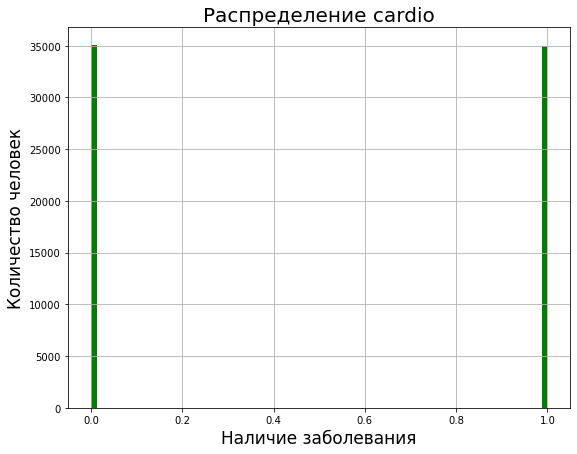

In [42]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.hist(train['cardio'], bins=77, color='g')
ax.set_title('Распределение cardio', fontdict = {'fontsize': 20})
ax.set_xlabel('Наличие заболевания', fontdict = {'fontsize': 17})
ax.set_ylabel('Количество человек', fontdict = {'fontsize': 17})
ax.grid()
plt.show()

Дисбаланс классов отсутствует

In [43]:
features = train.drop(['cardio', 'id'], axis=1)
target = train['cardio']

In [44]:
scaler = StandardScaler()
scaler.fit(features)
features_scalered = scaler.transform(features)

In [75]:
features_test = scaler.transform(test.drop('id', axis=1))

In [46]:
%%time


depths = []
samples = []
estimators = []
for i in range(1, 151, 50):
    depths.append(i)
for i in range(1, 152, 50):
    estimators.append(i)

search_space = {
    "max_depth" : depths,
    "n_estimators" : estimators
}


model = RandomForestClassifier(random_state=12345, class_weight='balanced')

GS = GridSearchCV(estimator = model,
                  param_grid = search_space,
                  scoring = 'roc_auc',
                  cv = 4,
                  verbose = 4)

GS.fit(features_scalered, target)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV 1/4] END ....................max_depth=1, n_estimators=1; total time=   0.0s
[CV 2/4] END ....................max_depth=1, n_estimators=1; total time=   0.0s
[CV 3/4] END ....................max_depth=1, n_estimators=1; total time=   0.0s
[CV 4/4] END ....................max_depth=1, n_estimators=1; total time=   0.0s
[CV 1/4] END ...................max_depth=1, n_estimators=51; total time=   0.6s
[CV 2/4] END ...................max_depth=1, n_estimators=51; total time=   0.7s
[CV 3/4] END ...................max_depth=1, n_estimators=51; total time=   0.7s
[CV 4/4] END ...................max_depth=1, n_estimators=51; total time=   0.7s
[CV 1/4] END ..................max_depth=1, n_estimators=101; total time=   1.5s
[CV 2/4] END ..................max_depth=1, n_estimators=101; total time=   1.4s
[CV 3/4] END ..................max_depth=1, n_estimators=101; total time=   1.4s
[CV 4/4] END ..................max_depth=1, n_es

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=12345),
             param_grid={'max_depth': [1, 51, 101],
                         'n_estimators': [1, 51, 101, 151]},
             scoring='roc_auc', verbose=4)

In [47]:
print(GS.best_estimator_)
print(GS.best_score_)
probabilities = GS.predict_proba(features_scalered)
probabilities_one_valid = probabilities[:, 1]

RandomForestClassifier(class_weight='balanced', max_depth=51, n_estimators=151,
                       random_state=12345)
0.7770333493619686


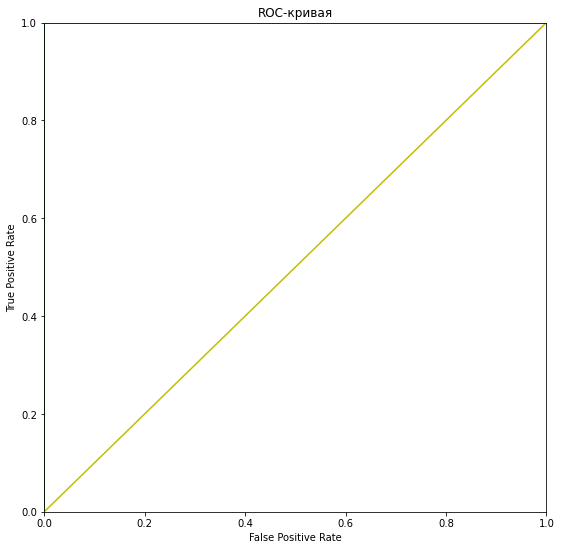

In [48]:
fpr, tpr, thresholds = roc_curve(target, probabilities_one_valid)
x = [0, 1]
y = [0, 1]

plt.figure(figsize=(9, 9))
plt.plot(fpr, tpr, color='g')
plt.plot(x, y, color='y')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

In [49]:
%%time 



model_lgs = LogisticRegression(random_state=12345)
iters=[]
c_num = []
for i in range(1, 20):
    iters.append(i)
for j in range(1, 3):
    c_num.append(j)
search_space = {
    "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "max_iter" : iters,
    'C' : c_num
}

GS = GridSearchCV(estimator = model_lgs,
                  param_grid = search_space,
                  scoring = 'roc_auc',
                  cv = 4,
                  verbose = 4)

GS.fit(features_scalered, target)

Fitting 4 folds for each of 190 candidates, totalling 760 fits
[CV 1/4] END ..............C=1, max_iter=1, solver=newton-cg; total time=   0.0s
[CV 2/4] END ..............C=1, max_iter=1, solver=newton-cg; total time=   0.0s
[CV 3/4] END ..............C=1, max_iter=1, solver=newton-cg; total time=   0.0s
[CV 4/4] END ..............C=1, max_iter=1, solver=newton-cg; total time=   0.0s
[CV 1/4] END ..................C=1, max_iter=1, solver=lbfgs; total time=   0.0s
[CV 2/4] END ..................C=1, max_iter=1, solver=lbfgs; total time=   0.0s
[CV 3/4] END ..................C=1, max_iter=1, solver=lbfgs; total time=   0.0s
[CV 4/4] END ..................C=1, max_iter=1, solver=lbfgs; total time=   0.0s
[CV 1/4] END ..............C=1, max_iter=1, solver=liblinear; total time=   0.0s
[CV 2/4] END ..............C=1, max_iter=1, solver=liblinear; total time=   0.0s
[CV 3/4] END ..............C=1, max_iter=1, solver=liblinear; total time=   0.0s
[CV 4/4] END ..............C=1, max_iter=1, so

[CV 3/4] END ..............C=1, max_iter=6, solver=newton-cg; total time=   0.0s
[CV 4/4] END ..............C=1, max_iter=6, solver=newton-cg; total time=   0.0s
[CV 1/4] END ..................C=1, max_iter=6, solver=lbfgs; total time=   0.0s
[CV 2/4] END ..................C=1, max_iter=6, solver=lbfgs; total time=   0.0s
[CV 3/4] END ..................C=1, max_iter=6, solver=lbfgs; total time=   0.0s
[CV 4/4] END ..................C=1, max_iter=6, solver=lbfgs; total time=   0.0s
[CV 1/4] END ..............C=1, max_iter=6, solver=liblinear; total time=   0.1s
[CV 2/4] END ..............C=1, max_iter=6, solver=liblinear; total time=   0.1s
[CV 3/4] END ..............C=1, max_iter=6, solver=liblinear; total time=   0.1s
[CV 4/4] END ..............C=1, max_iter=6, solver=liblinear; total time=   0.1s
[CV 1/4] END ....................C=1, max_iter=6, solver=sag; total time=   0.1s
[CV 2/4] END ....................C=1, max_iter=6, solver=sag; total time=   0.1s
[CV 3/4] END ...............

[CV 3/4] END .................C=1, max_iter=11, solver=lbfgs; total time=   0.0s
[CV 4/4] END .................C=1, max_iter=11, solver=lbfgs; total time=   0.0s
[CV 1/4] END .............C=1, max_iter=11, solver=liblinear; total time=   0.1s
[CV 2/4] END .............C=1, max_iter=11, solver=liblinear; total time=   0.1s
[CV 3/4] END .............C=1, max_iter=11, solver=liblinear; total time=   0.1s
[CV 4/4] END .............C=1, max_iter=11, solver=liblinear; total time=   0.1s
[CV 1/4] END ...................C=1, max_iter=11, solver=sag; total time=   0.2s
[CV 2/4] END ...................C=1, max_iter=11, solver=sag; total time=   0.2s
[CV 3/4] END ...................C=1, max_iter=11, solver=sag; total time=   0.2s
[CV 4/4] END ...................C=1, max_iter=11, solver=sag; total time=   0.2s
[CV 1/4] END ..................C=1, max_iter=11, solver=saga; total time=   0.2s
[CV 2/4] END ..................C=1, max_iter=11, solver=saga; total time=   0.2s
[CV 3/4] END ...............

[CV 1/4] END .............C=1, max_iter=16, solver=liblinear; total time=   0.1s
[CV 2/4] END .............C=1, max_iter=16, solver=liblinear; total time=   0.1s
[CV 3/4] END .............C=1, max_iter=16, solver=liblinear; total time=   0.1s
[CV 4/4] END .............C=1, max_iter=16, solver=liblinear; total time=   0.1s
[CV 1/4] END ...................C=1, max_iter=16, solver=sag; total time=   0.4s
[CV 2/4] END ...................C=1, max_iter=16, solver=sag; total time=   0.4s
[CV 3/4] END ...................C=1, max_iter=16, solver=sag; total time=   0.4s
[CV 4/4] END ...................C=1, max_iter=16, solver=sag; total time=   0.4s
[CV 1/4] END ..................C=1, max_iter=16, solver=saga; total time=   0.3s
[CV 2/4] END ..................C=1, max_iter=16, solver=saga; total time=   0.3s
[CV 3/4] END ..................C=1, max_iter=16, solver=saga; total time=   0.3s
[CV 4/4] END ..................C=1, max_iter=16, solver=saga; total time=   0.3s
[CV 1/4] END .............C=

[CV 1/4] END ....................C=2, max_iter=2, solver=sag; total time=   0.0s
[CV 2/4] END ....................C=2, max_iter=2, solver=sag; total time=   0.0s
[CV 3/4] END ....................C=2, max_iter=2, solver=sag; total time=   0.0s
[CV 4/4] END ....................C=2, max_iter=2, solver=sag; total time=   0.0s
[CV 1/4] END ...................C=2, max_iter=2, solver=saga; total time=   0.0s
[CV 2/4] END ...................C=2, max_iter=2, solver=saga; total time=   0.0s
[CV 3/4] END ...................C=2, max_iter=2, solver=saga; total time=   0.0s
[CV 4/4] END ...................C=2, max_iter=2, solver=saga; total time=   0.0s
[CV 1/4] END ..............C=2, max_iter=3, solver=newton-cg; total time=   0.0s
[CV 2/4] END ..............C=2, max_iter=3, solver=newton-cg; total time=   0.0s
[CV 3/4] END ..............C=2, max_iter=3, solver=newton-cg; total time=   0.0s
[CV 4/4] END ..............C=2, max_iter=3, solver=newton-cg; total time=   0.0s
[CV 1/4] END ...............

[CV 3/4] END ....................C=2, max_iter=7, solver=sag; total time=   0.1s
[CV 4/4] END ....................C=2, max_iter=7, solver=sag; total time=   0.1s
[CV 1/4] END ...................C=2, max_iter=7, solver=saga; total time=   0.1s
[CV 2/4] END ...................C=2, max_iter=7, solver=saga; total time=   0.1s
[CV 3/4] END ...................C=2, max_iter=7, solver=saga; total time=   0.1s
[CV 4/4] END ...................C=2, max_iter=7, solver=saga; total time=   0.1s
[CV 1/4] END ..............C=2, max_iter=8, solver=newton-cg; total time=   0.1s
[CV 2/4] END ..............C=2, max_iter=8, solver=newton-cg; total time=   0.1s
[CV 3/4] END ..............C=2, max_iter=8, solver=newton-cg; total time=   0.1s
[CV 4/4] END ..............C=2, max_iter=8, solver=newton-cg; total time=   0.1s
[CV 1/4] END ..................C=2, max_iter=8, solver=lbfgs; total time=   0.0s
[CV 2/4] END ..................C=2, max_iter=8, solver=lbfgs; total time=   0.0s
[CV 3/4] END ...............

[CV 1/4] END ..................C=2, max_iter=12, solver=saga; total time=   0.2s
[CV 2/4] END ..................C=2, max_iter=12, solver=saga; total time=   0.2s
[CV 3/4] END ..................C=2, max_iter=12, solver=saga; total time=   0.2s
[CV 4/4] END ..................C=2, max_iter=12, solver=saga; total time=   0.2s
[CV 1/4] END .............C=2, max_iter=13, solver=newton-cg; total time=   0.2s
[CV 2/4] END .............C=2, max_iter=13, solver=newton-cg; total time=   0.2s
[CV 3/4] END .............C=2, max_iter=13, solver=newton-cg; total time=   0.2s
[CV 4/4] END .............C=2, max_iter=13, solver=newton-cg; total time=   0.2s
[CV 1/4] END .................C=2, max_iter=13, solver=lbfgs; total time=   0.0s
[CV 2/4] END .................C=2, max_iter=13, solver=lbfgs; total time=   0.0s
[CV 3/4] END .................C=2, max_iter=13, solver=lbfgs; total time=   0.0s
[CV 4/4] END .................C=2, max_iter=13, solver=lbfgs; total time=   0.0s
[CV 1/4] END .............C=

[CV 3/4] END ..................C=2, max_iter=17, solver=saga; total time=   0.3s
[CV 4/4] END ..................C=2, max_iter=17, solver=saga; total time=   0.3s
[CV 1/4] END .............C=2, max_iter=18, solver=newton-cg; total time=   0.2s
[CV 2/4] END .............C=2, max_iter=18, solver=newton-cg; total time=   0.2s
[CV 3/4] END .............C=2, max_iter=18, solver=newton-cg; total time=   0.2s
[CV 4/4] END .............C=2, max_iter=18, solver=newton-cg; total time=   0.2s
[CV 1/4] END .................C=2, max_iter=18, solver=lbfgs; total time=   0.0s
[CV 2/4] END .................C=2, max_iter=18, solver=lbfgs; total time=   0.0s
[CV 3/4] END .................C=2, max_iter=18, solver=lbfgs; total time=   0.0s
[CV 4/4] END .................C=2, max_iter=18, solver=lbfgs; total time=   0.0s
[CV 1/4] END .............C=2, max_iter=18, solver=liblinear; total time=   0.1s
[CV 2/4] END .............C=2, max_iter=18, solver=liblinear; total time=   0.1s
[CV 3/4] END .............C=

GridSearchCV(cv=4, estimator=LogisticRegression(random_state=12345),
             param_grid={'C': [1, 2],
                         'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                      14, 15, 16, 17, 18, 19],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc', verbose=4)

In [50]:
print(GS.best_estimator_)
print(GS.best_score_)
probabilities = GS.predict_proba(features_scalered)
probabilities_one_valid = probabilities[:, 1]

LogisticRegression(C=1, max_iter=6, random_state=12345)
0.7921387734918798


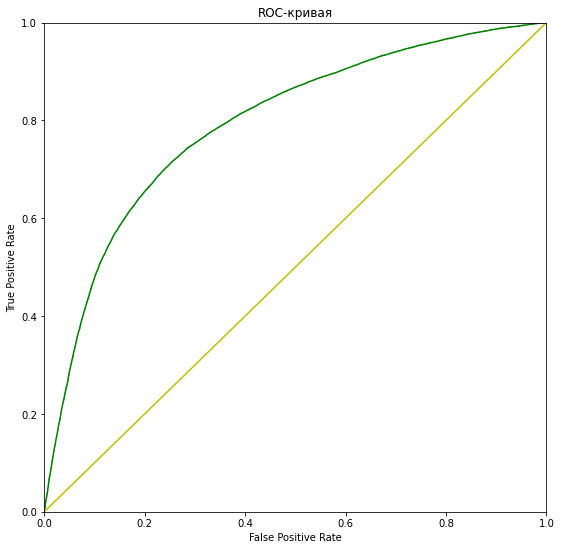

In [51]:
fpr, tpr, thresholds = roc_curve(target, probabilities_one_valid)
x = [0, 1]
y = [0, 1]

plt.figure(figsize=(9, 9))
plt.plot(fpr, tpr, color='g')
plt.plot(x, y, color='y')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [53]:
features_train, features_valid, target_train, target_valid = train_test_split(features_scalered, target, test_size=0.75, 
                                                                                      random_state=12345)

In [54]:
best_roc_auc = 0
best_iter = 0
best_depth = 0
for iters in range(1, 251, 30):
    for depths in range(1, 8):
        model = CatBoostClassifier(random_state = 12345, iterations = iters, 
                                    depth=depths, loss_function='Logloss', verbose=True)
        model.fit(features_train, target_train)
        prediction = model.predict(features_valid)
        proba = model.predict_proba(features_valid)
        proba_one = proba[:, 1]
        roc_auc = roc_auc_score(target_valid, proba_one)
        if roc_auc > best_roc_auc:
            best_roc_auc = roc_auc
            best_iter = iters
            best_depth = depths
print(f'Лучший рок_аук: {best_roc_auc}, Лучшее кол-во деревьев: {best_iter}, Лучшая глубина: {best_depth}')

Learning rate set to 0.5
0:	learn: 0.6240449	total: 157ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6157465	total: 2.95ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6138725	total: 3.42ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6074929	total: 4.44ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6067788	total: 4.48ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6005250	total: 5.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6001691	total: 6.73ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.6240449	total: 2.58ms	remaining: 77.5ms
1:	learn: 0.5969483	total: 5.69ms	remaining: 82.6ms
2:	learn: 0.5894615	total: 7.95ms	remaining: 74.2ms
3:	learn: 0.5815523	total: 10.3ms	remaining: 69.7ms
4:	learn: 0.5753818	total: 12.5ms	remaining: 65.1ms
5:	learn: 0.5716317	total: 14.8ms	remaining: 61.6ms
6:	learn: 0.5688524	total: 17.3ms	remaining: 59.4ms
7:	learn: 0.5668751	total: 19.9ms	remaining: 57.2ms
8:	learn: 0.5648623	total: 22.5ms	remaining

Learning rate set to 0.5
0:	learn: 0.6005250	total: 5.47ms	remaining: 164ms
1:	learn: 0.5688886	total: 10.3ms	remaining: 150ms
2:	learn: 0.5569575	total: 15.3ms	remaining: 143ms
3:	learn: 0.5509858	total: 20ms	remaining: 135ms
4:	learn: 0.5472157	total: 25ms	remaining: 130ms
5:	learn: 0.5446599	total: 29.6ms	remaining: 123ms
6:	learn: 0.5432605	total: 34.5ms	remaining: 118ms
7:	learn: 0.5419933	total: 40.4ms	remaining: 116ms
8:	learn: 0.5406719	total: 46.7ms	remaining: 114ms
9:	learn: 0.5398348	total: 53.2ms	remaining: 112ms
10:	learn: 0.5385414	total: 58.7ms	remaining: 107ms
11:	learn: 0.5374245	total: 64.8ms	remaining: 103ms
12:	learn: 0.5366687	total: 70.2ms	remaining: 97.3ms
13:	learn: 0.5362057	total: 75.6ms	remaining: 91.8ms
14:	learn: 0.5357319	total: 80.9ms	remaining: 86.3ms
15:	learn: 0.5350453	total: 85.7ms	remaining: 80.3ms
16:	learn: 0.5345031	total: 90.4ms	remaining: 74.5ms
17:	learn: 0.5341282	total: 95.3ms	remaining: 68.8ms
18:	learn: 0.5337941	total: 100ms	remaining: 63

57:	learn: 0.5411432	total: 160ms	remaining: 8.28ms
58:	learn: 0.5408386	total: 163ms	remaining: 5.54ms
59:	learn: 0.5406472	total: 166ms	remaining: 2.77ms
60:	learn: 0.5403978	total: 169ms	remaining: 0us
Learning rate set to 0.454531
0:	learn: 0.6189744	total: 3.77ms	remaining: 226ms
1:	learn: 0.5843853	total: 7.02ms	remaining: 207ms
2:	learn: 0.5692479	total: 9.97ms	remaining: 193ms
3:	learn: 0.5639697	total: 13.2ms	remaining: 188ms
4:	learn: 0.5581343	total: 16.3ms	remaining: 182ms
5:	learn: 0.5548774	total: 19.2ms	remaining: 176ms
6:	learn: 0.5529137	total: 22.4ms	remaining: 173ms
7:	learn: 0.5515023	total: 25.6ms	remaining: 170ms
8:	learn: 0.5507468	total: 28.7ms	remaining: 166ms
9:	learn: 0.5495057	total: 32ms	remaining: 163ms
10:	learn: 0.5486823	total: 34.9ms	remaining: 159ms
11:	learn: 0.5478395	total: 37.9ms	remaining: 155ms
12:	learn: 0.5474262	total: 40.9ms	remaining: 151ms
13:	learn: 0.5465961	total: 43.9ms	remaining: 147ms
14:	learn: 0.5463862	total: 47.6ms	remaining: 146

56:	learn: 0.5247120	total: 521ms	remaining: 36.5ms
57:	learn: 0.5242053	total: 526ms	remaining: 27.2ms
58:	learn: 0.5239606	total: 531ms	remaining: 18ms
59:	learn: 0.5239112	total: 535ms	remaining: 8.92ms
60:	learn: 0.5237251	total: 540ms	remaining: 0us
Learning rate set to 0.454531
0:	learn: 0.6065832	total: 5.25ms	remaining: 315ms
1:	learn: 0.5735265	total: 10.1ms	remaining: 298ms
2:	learn: 0.5600376	total: 15.2ms	remaining: 295ms
3:	learn: 0.5528042	total: 19.9ms	remaining: 283ms
4:	learn: 0.5486108	total: 25ms	remaining: 280ms
5:	learn: 0.5458335	total: 30.5ms	remaining: 279ms
6:	learn: 0.5439942	total: 35.4ms	remaining: 273ms
7:	learn: 0.5426249	total: 40.5ms	remaining: 268ms
8:	learn: 0.5415563	total: 45.5ms	remaining: 263ms
9:	learn: 0.5406642	total: 50.4ms	remaining: 257ms
10:	learn: 0.5396440	total: 55.6ms	remaining: 253ms
11:	learn: 0.5383239	total: 61.4ms	remaining: 251ms
12:	learn: 0.5377880	total: 67ms	remaining: 247ms
13:	learn: 0.5365432	total: 73.1ms	remaining: 246ms
1

64:	learn: 0.5537134	total: 159ms	remaining: 63.6ms
65:	learn: 0.5536495	total: 162ms	remaining: 61.4ms
66:	learn: 0.5536161	total: 164ms	remaining: 58.9ms
67:	learn: 0.5535583	total: 167ms	remaining: 56.4ms
68:	learn: 0.5535336	total: 169ms	remaining: 54ms
69:	learn: 0.5534852	total: 171ms	remaining: 51.4ms
70:	learn: 0.5534354	total: 174ms	remaining: 49ms
71:	learn: 0.5534243	total: 177ms	remaining: 46.6ms
72:	learn: 0.5533677	total: 179ms	remaining: 44.1ms
73:	learn: 0.5533296	total: 181ms	remaining: 41.6ms
74:	learn: 0.5532979	total: 184ms	remaining: 39.1ms
75:	learn: 0.5532659	total: 186ms	remaining: 36.7ms
76:	learn: 0.5532285	total: 188ms	remaining: 34.2ms
77:	learn: 0.5531940	total: 191ms	remaining: 31.8ms
78:	learn: 0.5531841	total: 193ms	remaining: 29.3ms
79:	learn: 0.5531454	total: 195ms	remaining: 26.8ms
80:	learn: 0.5531187	total: 198ms	remaining: 24.4ms
81:	learn: 0.5531100	total: 200ms	remaining: 21.9ms
82:	learn: 0.5530808	total: 202ms	remaining: 19.5ms
83:	learn: 0.553

51:	learn: 0.5403084	total: 172ms	remaining: 129ms
52:	learn: 0.5402519	total: 176ms	remaining: 126ms
53:	learn: 0.5402146	total: 180ms	remaining: 123ms
54:	learn: 0.5401232	total: 183ms	remaining: 120ms
55:	learn: 0.5400572	total: 186ms	remaining: 116ms
56:	learn: 0.5397840	total: 190ms	remaining: 113ms
57:	learn: 0.5394053	total: 194ms	remaining: 110ms
58:	learn: 0.5392135	total: 197ms	remaining: 107ms
59:	learn: 0.5390273	total: 201ms	remaining: 104ms
60:	learn: 0.5389216	total: 205ms	remaining: 101ms
61:	learn: 0.5389123	total: 208ms	remaining: 97.4ms
62:	learn: 0.5388955	total: 212ms	remaining: 94.1ms
63:	learn: 0.5387173	total: 216ms	remaining: 91.2ms
64:	learn: 0.5386671	total: 220ms	remaining: 87.9ms
65:	learn: 0.5384837	total: 223ms	remaining: 84.6ms
66:	learn: 0.5382432	total: 227ms	remaining: 81.4ms
67:	learn: 0.5381788	total: 231ms	remaining: 78.2ms
68:	learn: 0.5380907	total: 235ms	remaining: 74.8ms
69:	learn: 0.5378978	total: 238ms	remaining: 71.5ms
70:	learn: 0.5377659	t

41:	learn: 0.5327888	total: 176ms	remaining: 205ms
42:	learn: 0.5326564	total: 180ms	remaining: 201ms
43:	learn: 0.5325133	total: 184ms	remaining: 196ms
44:	learn: 0.5323764	total: 188ms	remaining: 192ms
45:	learn: 0.5322005	total: 192ms	remaining: 188ms
46:	learn: 0.5321513	total: 195ms	remaining: 183ms
47:	learn: 0.5317743	total: 200ms	remaining: 179ms
48:	learn: 0.5317183	total: 204ms	remaining: 175ms
49:	learn: 0.5311889	total: 208ms	remaining: 170ms
50:	learn: 0.5311616	total: 211ms	remaining: 166ms
51:	learn: 0.5309747	total: 215ms	remaining: 162ms
52:	learn: 0.5309516	total: 219ms	remaining: 157ms
53:	learn: 0.5306849	total: 224ms	remaining: 153ms
54:	learn: 0.5304559	total: 227ms	remaining: 149ms
55:	learn: 0.5302299	total: 231ms	remaining: 145ms
56:	learn: 0.5300508	total: 235ms	remaining: 140ms
57:	learn: 0.5296995	total: 240ms	remaining: 136ms
58:	learn: 0.5296732	total: 244ms	remaining: 132ms
59:	learn: 0.5295885	total: 248ms	remaining: 128ms
60:	learn: 0.5293711	total: 252

28:	learn: 0.5282666	total: 182ms	remaining: 389ms
29:	learn: 0.5277464	total: 188ms	remaining: 383ms
30:	learn: 0.5274849	total: 194ms	remaining: 376ms
31:	learn: 0.5270870	total: 200ms	remaining: 369ms
32:	learn: 0.5264466	total: 206ms	remaining: 363ms
33:	learn: 0.5259880	total: 212ms	remaining: 356ms
34:	learn: 0.5255714	total: 218ms	remaining: 349ms
35:	learn: 0.5248644	total: 224ms	remaining: 342ms
36:	learn: 0.5247081	total: 230ms	remaining: 336ms
37:	learn: 0.5242206	total: 236ms	remaining: 329ms
38:	learn: 0.5240589	total: 242ms	remaining: 323ms
39:	learn: 0.5236855	total: 248ms	remaining: 316ms
40:	learn: 0.5233509	total: 253ms	remaining: 309ms
41:	learn: 0.5230647	total: 259ms	remaining: 303ms
42:	learn: 0.5223370	total: 266ms	remaining: 296ms
43:	learn: 0.5219786	total: 271ms	remaining: 290ms
44:	learn: 0.5216535	total: 277ms	remaining: 283ms
45:	learn: 0.5214571	total: 283ms	remaining: 277ms
46:	learn: 0.5213016	total: 289ms	remaining: 270ms
47:	learn: 0.5211761	total: 294

Learning rate set to 0.242548
0:	learn: 0.6492496	total: 2.97ms	remaining: 356ms
1:	learn: 0.6189854	total: 5.7ms	remaining: 339ms
2:	learn: 0.6012384	total: 8.17ms	remaining: 321ms
3:	learn: 0.5882930	total: 11.1ms	remaining: 323ms
4:	learn: 0.5794476	total: 13.9ms	remaining: 323ms
5:	learn: 0.5736407	total: 16.8ms	remaining: 321ms
6:	learn: 0.5688113	total: 19.6ms	remaining: 320ms
7:	learn: 0.5658588	total: 22.4ms	remaining: 316ms
8:	learn: 0.5629852	total: 25.3ms	remaining: 314ms
9:	learn: 0.5613903	total: 28.2ms	remaining: 313ms
10:	learn: 0.5601068	total: 31.3ms	remaining: 313ms
11:	learn: 0.5586930	total: 34.1ms	remaining: 310ms
12:	learn: 0.5578486	total: 37.2ms	remaining: 309ms
13:	learn: 0.5568352	total: 39.7ms	remaining: 304ms
14:	learn: 0.5557336	total: 42.6ms	remaining: 301ms
15:	learn: 0.5545598	total: 45.5ms	remaining: 298ms
16:	learn: 0.5538415	total: 48.4ms	remaining: 296ms
17:	learn: 0.5533439	total: 51.3ms	remaining: 293ms
18:	learn: 0.5525875	total: 54.1ms	remaining:

40:	learn: 0.5431789	total: 168ms	remaining: 327ms
41:	learn: 0.5430924	total: 171ms	remaining: 322ms
42:	learn: 0.5430624	total: 175ms	remaining: 318ms
43:	learn: 0.5430200	total: 179ms	remaining: 314ms
44:	learn: 0.5429381	total: 183ms	remaining: 309ms
45:	learn: 0.5428241	total: 187ms	remaining: 306ms
46:	learn: 0.5426532	total: 192ms	remaining: 302ms
47:	learn: 0.5425876	total: 195ms	remaining: 297ms
48:	learn: 0.5424188	total: 199ms	remaining: 293ms
49:	learn: 0.5421868	total: 204ms	remaining: 289ms
50:	learn: 0.5421591	total: 208ms	remaining: 285ms
51:	learn: 0.5419848	total: 212ms	remaining: 281ms
52:	learn: 0.5416076	total: 216ms	remaining: 277ms
53:	learn: 0.5415098	total: 220ms	remaining: 273ms
54:	learn: 0.5413754	total: 224ms	remaining: 268ms
55:	learn: 0.5412895	total: 227ms	remaining: 264ms
56:	learn: 0.5412349	total: 231ms	remaining: 260ms
57:	learn: 0.5409487	total: 236ms	remaining: 256ms
58:	learn: 0.5409105	total: 240ms	remaining: 252ms
59:	learn: 0.5406915	total: 244

85:	learn: 0.5331399	total: 347ms	remaining: 141ms
86:	learn: 0.5329982	total: 351ms	remaining: 137ms
87:	learn: 0.5329254	total: 355ms	remaining: 133ms
88:	learn: 0.5328126	total: 359ms	remaining: 129ms
89:	learn: 0.5326199	total: 362ms	remaining: 125ms
90:	learn: 0.5324246	total: 366ms	remaining: 121ms
91:	learn: 0.5324068	total: 369ms	remaining: 116ms
92:	learn: 0.5323412	total: 373ms	remaining: 112ms
93:	learn: 0.5323333	total: 376ms	remaining: 108ms
94:	learn: 0.5323275	total: 379ms	remaining: 104ms
95:	learn: 0.5321961	total: 383ms	remaining: 99.8ms
96:	learn: 0.5321045	total: 387ms	remaining: 95.7ms
97:	learn: 0.5320502	total: 390ms	remaining: 91.6ms
98:	learn: 0.5319741	total: 394ms	remaining: 87.6ms
99:	learn: 0.5318223	total: 398ms	remaining: 83.6ms
100:	learn: 0.5317134	total: 401ms	remaining: 79.5ms
101:	learn: 0.5315563	total: 405ms	remaining: 75.5ms
102:	learn: 0.5313718	total: 409ms	remaining: 71.4ms
103:	learn: 0.5312662	total: 412ms	remaining: 67.4ms
104:	learn: 0.5311

24:	learn: 0.5366196	total: 188ms	remaining: 722ms
25:	learn: 0.5363334	total: 203ms	remaining: 741ms
26:	learn: 0.5359884	total: 218ms	remaining: 759ms
27:	learn: 0.5355320	total: 328ms	remaining: 1.09s
28:	learn: 0.5350558	total: 346ms	remaining: 1.1s
29:	learn: 0.5346292	total: 389ms	remaining: 1.18s
30:	learn: 0.5343564	total: 402ms	remaining: 1.17s
31:	learn: 0.5340780	total: 414ms	remaining: 1.15s
32:	learn: 0.5338309	total: 427ms	remaining: 1.14s
33:	learn: 0.5334322	total: 440ms	remaining: 1.13s
34:	learn: 0.5332269	total: 451ms	remaining: 1.11s
35:	learn: 0.5329618	total: 460ms	remaining: 1.08s
36:	learn: 0.5328521	total: 466ms	remaining: 1.06s
37:	learn: 0.5322221	total: 474ms	remaining: 1.03s
38:	learn: 0.5319157	total: 482ms	remaining: 1.01s
39:	learn: 0.5317062	total: 488ms	remaining: 989ms
40:	learn: 0.5315106	total: 494ms	remaining: 964ms
41:	learn: 0.5312310	total: 500ms	remaining: 940ms
42:	learn: 0.5309356	total: 505ms	remaining: 916ms
43:	learn: 0.5307988	total: 511m

80:	learn: 0.5159731	total: 525ms	remaining: 259ms
81:	learn: 0.5156775	total: 531ms	remaining: 253ms
82:	learn: 0.5153683	total: 537ms	remaining: 246ms
83:	learn: 0.5150620	total: 544ms	remaining: 240ms
84:	learn: 0.5149130	total: 550ms	remaining: 233ms
85:	learn: 0.5147446	total: 556ms	remaining: 226ms
86:	learn: 0.5145932	total: 561ms	remaining: 219ms
87:	learn: 0.5142313	total: 567ms	remaining: 213ms
88:	learn: 0.5137907	total: 573ms	remaining: 206ms
89:	learn: 0.5134811	total: 579ms	remaining: 200ms
90:	learn: 0.5131350	total: 585ms	remaining: 193ms
91:	learn: 0.5129204	total: 591ms	remaining: 186ms
92:	learn: 0.5129085	total: 596ms	remaining: 180ms
93:	learn: 0.5125684	total: 603ms	remaining: 173ms
94:	learn: 0.5124384	total: 609ms	remaining: 167ms
95:	learn: 0.5120491	total: 617ms	remaining: 161ms
96:	learn: 0.5117846	total: 624ms	remaining: 154ms
97:	learn: 0.5114285	total: 631ms	remaining: 148ms
98:	learn: 0.5113412	total: 639ms	remaining: 142ms
99:	learn: 0.5112112	total: 645

137:	learn: 0.5526230	total: 329ms	remaining: 30.9ms
138:	learn: 0.5526158	total: 331ms	remaining: 28.6ms
139:	learn: 0.5525953	total: 334ms	remaining: 26.2ms
140:	learn: 0.5525728	total: 336ms	remaining: 23.8ms
141:	learn: 0.5525685	total: 338ms	remaining: 21.4ms
142:	learn: 0.5525544	total: 341ms	remaining: 19.1ms
143:	learn: 0.5525478	total: 343ms	remaining: 16.7ms
144:	learn: 0.5525347	total: 346ms	remaining: 14.3ms
145:	learn: 0.5525233	total: 348ms	remaining: 11.9ms
146:	learn: 0.5525053	total: 351ms	remaining: 9.55ms
147:	learn: 0.5524897	total: 354ms	remaining: 7.17ms
148:	learn: 0.5524838	total: 356ms	remaining: 4.78ms
149:	learn: 0.5524794	total: 359ms	remaining: 2.39ms
150:	learn: 0.5524593	total: 361ms	remaining: 0us
Learning rate set to 0.197965
0:	learn: 0.6564148	total: 2.85ms	remaining: 428ms
1:	learn: 0.6292827	total: 6.37ms	remaining: 474ms
2:	learn: 0.6118255	total: 9.18ms	remaining: 453ms
3:	learn: 0.5988548	total: 11.9ms	remaining: 436ms
4:	learn: 0.5889031	total: 

Learning rate set to 0.197965
0:	learn: 0.6555580	total: 3.76ms	remaining: 564ms
1:	learn: 0.6274917	total: 7.28ms	remaining: 543ms
2:	learn: 0.6073225	total: 10.3ms	remaining: 506ms
3:	learn: 0.5930531	total: 13.4ms	remaining: 493ms
4:	learn: 0.5834465	total: 17ms	remaining: 496ms
5:	learn: 0.5752129	total: 20ms	remaining: 483ms
6:	learn: 0.5700565	total: 23.3ms	remaining: 479ms
7:	learn: 0.5660101	total: 26.4ms	remaining: 471ms
8:	learn: 0.5628017	total: 29.4ms	remaining: 464ms
9:	learn: 0.5603008	total: 32.7ms	remaining: 461ms
10:	learn: 0.5585056	total: 35.7ms	remaining: 455ms
11:	learn: 0.5567757	total: 38.9ms	remaining: 451ms
12:	learn: 0.5553706	total: 42.7ms	remaining: 453ms
13:	learn: 0.5541495	total: 46.1ms	remaining: 451ms
14:	learn: 0.5532442	total: 49.2ms	remaining: 446ms
15:	learn: 0.5524789	total: 52.4ms	remaining: 442ms
16:	learn: 0.5517004	total: 55.4ms	remaining: 437ms
17:	learn: 0.5510600	total: 58.4ms	remaining: 431ms
18:	learn: 0.5504913	total: 61.5ms	remaining: 42

45:	learn: 0.5404175	total: 167ms	remaining: 382ms
46:	learn: 0.5402983	total: 171ms	remaining: 378ms
47:	learn: 0.5400158	total: 174ms	remaining: 374ms
48:	learn: 0.5399096	total: 178ms	remaining: 370ms
49:	learn: 0.5397974	total: 181ms	remaining: 366ms
50:	learn: 0.5396550	total: 185ms	remaining: 363ms
51:	learn: 0.5395294	total: 189ms	remaining: 361ms
52:	learn: 0.5392606	total: 194ms	remaining: 358ms
53:	learn: 0.5390090	total: 199ms	remaining: 357ms
54:	learn: 0.5389700	total: 203ms	remaining: 354ms
55:	learn: 0.5388308	total: 207ms	remaining: 351ms
56:	learn: 0.5387666	total: 211ms	remaining: 348ms
57:	learn: 0.5385421	total: 215ms	remaining: 344ms
58:	learn: 0.5385008	total: 218ms	remaining: 340ms
59:	learn: 0.5383695	total: 222ms	remaining: 336ms
60:	learn: 0.5382426	total: 225ms	remaining: 332ms
61:	learn: 0.5382021	total: 229ms	remaining: 328ms
62:	learn: 0.5380355	total: 232ms	remaining: 324ms
63:	learn: 0.5378858	total: 236ms	remaining: 320ms
64:	learn: 0.5378693	total: 239

80:	learn: 0.5321734	total: 336ms	remaining: 290ms
81:	learn: 0.5321457	total: 340ms	remaining: 286ms
82:	learn: 0.5320925	total: 344ms	remaining: 282ms
83:	learn: 0.5319463	total: 348ms	remaining: 278ms
84:	learn: 0.5317650	total: 353ms	remaining: 274ms
85:	learn: 0.5317301	total: 357ms	remaining: 270ms
86:	learn: 0.5316987	total: 361ms	remaining: 265ms
87:	learn: 0.5314897	total: 365ms	remaining: 261ms
88:	learn: 0.5314525	total: 369ms	remaining: 257ms
89:	learn: 0.5312456	total: 373ms	remaining: 253ms
90:	learn: 0.5310421	total: 378ms	remaining: 249ms
91:	learn: 0.5309503	total: 382ms	remaining: 245ms
92:	learn: 0.5307948	total: 386ms	remaining: 241ms
93:	learn: 0.5307305	total: 391ms	remaining: 237ms
94:	learn: 0.5307099	total: 395ms	remaining: 233ms
95:	learn: 0.5306400	total: 399ms	remaining: 229ms
96:	learn: 0.5305563	total: 403ms	remaining: 224ms
97:	learn: 0.5303990	total: 407ms	remaining: 220ms
98:	learn: 0.5303430	total: 411ms	remaining: 216ms
99:	learn: 0.5302405	total: 415

103:	learn: 0.5230920	total: 743ms	remaining: 336ms
104:	learn: 0.5227508	total: 749ms	remaining: 328ms
105:	learn: 0.5225316	total: 753ms	remaining: 320ms
106:	learn: 0.5224279	total: 758ms	remaining: 312ms
107:	learn: 0.5222861	total: 763ms	remaining: 304ms
108:	learn: 0.5221867	total: 768ms	remaining: 296ms
109:	learn: 0.5219746	total: 772ms	remaining: 288ms
110:	learn: 0.5219584	total: 777ms	remaining: 280ms
111:	learn: 0.5217483	total: 782ms	remaining: 272ms
112:	learn: 0.5215379	total: 787ms	remaining: 265ms
113:	learn: 0.5214368	total: 792ms	remaining: 257ms
114:	learn: 0.5212937	total: 797ms	remaining: 249ms
115:	learn: 0.5211420	total: 802ms	remaining: 242ms
116:	learn: 0.5209322	total: 807ms	remaining: 234ms
117:	learn: 0.5207902	total: 811ms	remaining: 227ms
118:	learn: 0.5206875	total: 816ms	remaining: 219ms
119:	learn: 0.5205680	total: 821ms	remaining: 212ms
120:	learn: 0.5205092	total: 825ms	remaining: 205ms
121:	learn: 0.5204451	total: 830ms	remaining: 197ms
122:	learn: 

115:	learn: 0.5121937	total: 718ms	remaining: 217ms
116:	learn: 0.5118556	total: 724ms	remaining: 210ms
117:	learn: 0.5116658	total: 730ms	remaining: 204ms
118:	learn: 0.5116323	total: 736ms	remaining: 198ms
119:	learn: 0.5114748	total: 742ms	remaining: 192ms
120:	learn: 0.5110952	total: 750ms	remaining: 186ms
121:	learn: 0.5109883	total: 758ms	remaining: 180ms
122:	learn: 0.5108190	total: 764ms	remaining: 174ms
123:	learn: 0.5106172	total: 770ms	remaining: 168ms
124:	learn: 0.5104743	total: 777ms	remaining: 162ms
125:	learn: 0.5104652	total: 782ms	remaining: 155ms
126:	learn: 0.5102538	total: 788ms	remaining: 149ms
127:	learn: 0.5100381	total: 794ms	remaining: 143ms
128:	learn: 0.5099976	total: 800ms	remaining: 136ms
129:	learn: 0.5096269	total: 806ms	remaining: 130ms
130:	learn: 0.5093887	total: 812ms	remaining: 124ms
131:	learn: 0.5092483	total: 817ms	remaining: 118ms
132:	learn: 0.5087529	total: 825ms	remaining: 112ms
133:	learn: 0.5085608	total: 831ms	remaining: 105ms
134:	learn: 

138:	learn: 0.5530687	total: 338ms	remaining: 102ms
139:	learn: 0.5530443	total: 341ms	remaining: 99.8ms
140:	learn: 0.5530273	total: 344ms	remaining: 97.5ms
141:	learn: 0.5530212	total: 346ms	remaining: 95.1ms
142:	learn: 0.5530077	total: 349ms	remaining: 92.7ms
143:	learn: 0.5529983	total: 352ms	remaining: 90.4ms
144:	learn: 0.5529830	total: 355ms	remaining: 88.1ms
145:	learn: 0.5529722	total: 357ms	remaining: 85.6ms
146:	learn: 0.5529458	total: 360ms	remaining: 83.2ms
147:	learn: 0.5529199	total: 362ms	remaining: 80.7ms
148:	learn: 0.5529131	total: 364ms	remaining: 78.2ms
149:	learn: 0.5528938	total: 366ms	remaining: 75.7ms
150:	learn: 0.5528719	total: 368ms	remaining: 73.2ms
151:	learn: 0.5528540	total: 371ms	remaining: 70.8ms
152:	learn: 0.5528460	total: 373ms	remaining: 68.3ms
153:	learn: 0.5528308	total: 376ms	remaining: 65.9ms
154:	learn: 0.5528101	total: 378ms	remaining: 63.4ms
155:	learn: 0.5528048	total: 380ms	remaining: 60.9ms
156:	learn: 0.5527911	total: 382ms	remaining: 5

123:	learn: 0.5425268	total: 336ms	remaining: 154ms
124:	learn: 0.5424395	total: 339ms	remaining: 152ms
125:	learn: 0.5423334	total: 342ms	remaining: 149ms
126:	learn: 0.5422835	total: 345ms	remaining: 147ms
127:	learn: 0.5422657	total: 348ms	remaining: 144ms
128:	learn: 0.5422379	total: 350ms	remaining: 141ms
129:	learn: 0.5422111	total: 353ms	remaining: 138ms
130:	learn: 0.5422007	total: 356ms	remaining: 136ms
131:	learn: 0.5421579	total: 358ms	remaining: 133ms
132:	learn: 0.5421456	total: 361ms	remaining: 130ms
133:	learn: 0.5420884	total: 364ms	remaining: 128ms
134:	learn: 0.5420419	total: 366ms	remaining: 125ms
135:	learn: 0.5420196	total: 369ms	remaining: 122ms
136:	learn: 0.5419452	total: 372ms	remaining: 119ms
137:	learn: 0.5419306	total: 374ms	remaining: 117ms
138:	learn: 0.5418726	total: 377ms	remaining: 114ms
139:	learn: 0.5418265	total: 380ms	remaining: 111ms
140:	learn: 0.5417715	total: 382ms	remaining: 108ms
141:	learn: 0.5417627	total: 385ms	remaining: 106ms
142:	learn: 

105:	learn: 0.5391471	total: 336ms	remaining: 238ms
106:	learn: 0.5390140	total: 340ms	remaining: 235ms
107:	learn: 0.5389296	total: 343ms	remaining: 232ms
108:	learn: 0.5389063	total: 346ms	remaining: 228ms
109:	learn: 0.5387668	total: 349ms	remaining: 225ms
110:	learn: 0.5387588	total: 352ms	remaining: 222ms
111:	learn: 0.5386988	total: 355ms	remaining: 219ms
112:	learn: 0.5385198	total: 358ms	remaining: 215ms
113:	learn: 0.5385068	total: 361ms	remaining: 212ms
114:	learn: 0.5384094	total: 364ms	remaining: 209ms
115:	learn: 0.5383914	total: 367ms	remaining: 205ms
116:	learn: 0.5383184	total: 370ms	remaining: 202ms
117:	learn: 0.5382403	total: 373ms	remaining: 199ms
118:	learn: 0.5381920	total: 376ms	remaining: 196ms
119:	learn: 0.5381675	total: 379ms	remaining: 193ms
120:	learn: 0.5380967	total: 382ms	remaining: 189ms
121:	learn: 0.5380197	total: 385ms	remaining: 186ms
122:	learn: 0.5379285	total: 388ms	remaining: 183ms
123:	learn: 0.5378774	total: 391ms	remaining: 180ms
124:	learn: 

113:	learn: 0.5341567	total: 505ms	remaining: 297ms
114:	learn: 0.5340586	total: 510ms	remaining: 293ms
115:	learn: 0.5339992	total: 515ms	remaining: 288ms
116:	learn: 0.5338933	total: 519ms	remaining: 284ms
117:	learn: 0.5338086	total: 523ms	remaining: 279ms
118:	learn: 0.5337336	total: 527ms	remaining: 274ms
119:	learn: 0.5336334	total: 531ms	remaining: 270ms
120:	learn: 0.5335903	total: 535ms	remaining: 265ms
121:	learn: 0.5335039	total: 540ms	remaining: 261ms
122:	learn: 0.5334903	total: 544ms	remaining: 256ms
123:	learn: 0.5334121	total: 548ms	remaining: 252ms
124:	learn: 0.5332027	total: 552ms	remaining: 247ms
125:	learn: 0.5331312	total: 556ms	remaining: 243ms
126:	learn: 0.5331278	total: 560ms	remaining: 238ms
127:	learn: 0.5330189	total: 564ms	remaining: 234ms
128:	learn: 0.5329057	total: 569ms	remaining: 229ms
129:	learn: 0.5328043	total: 573ms	remaining: 225ms
130:	learn: 0.5326688	total: 577ms	remaining: 220ms
131:	learn: 0.5326191	total: 581ms	remaining: 216ms
132:	learn: 

108:	learn: 0.5309799	total: 520ms	remaining: 344ms
109:	learn: 0.5309564	total: 524ms	remaining: 338ms
110:	learn: 0.5308769	total: 528ms	remaining: 333ms
111:	learn: 0.5307807	total: 532ms	remaining: 328ms
112:	learn: 0.5304131	total: 536ms	remaining: 323ms
113:	learn: 0.5302568	total: 540ms	remaining: 318ms
114:	learn: 0.5300612	total: 545ms	remaining: 313ms
115:	learn: 0.5299507	total: 549ms	remaining: 307ms
116:	learn: 0.5299388	total: 552ms	remaining: 302ms
117:	learn: 0.5299003	total: 556ms	remaining: 297ms
118:	learn: 0.5296895	total: 561ms	remaining: 292ms
119:	learn: 0.5295940	total: 564ms	remaining: 287ms
120:	learn: 0.5295064	total: 568ms	remaining: 282ms
121:	learn: 0.5294329	total: 572ms	remaining: 277ms
122:	learn: 0.5292405	total: 577ms	remaining: 272ms
123:	learn: 0.5291390	total: 581ms	remaining: 267ms
124:	learn: 0.5289846	total: 585ms	remaining: 262ms
125:	learn: 0.5288776	total: 589ms	remaining: 257ms
126:	learn: 0.5288318	total: 593ms	remaining: 252ms
127:	learn: 

105:	learn: 0.5254590	total: 522ms	remaining: 370ms
106:	learn: 0.5252307	total: 527ms	remaining: 365ms
107:	learn: 0.5251240	total: 532ms	remaining: 360ms
108:	learn: 0.5248846	total: 537ms	remaining: 355ms
109:	learn: 0.5245889	total: 542ms	remaining: 350ms
110:	learn: 0.5244040	total: 547ms	remaining: 345ms
111:	learn: 0.5241132	total: 551ms	remaining: 340ms
112:	learn: 0.5238949	total: 556ms	remaining: 335ms
113:	learn: 0.5237531	total: 561ms	remaining: 330ms
114:	learn: 0.5235144	total: 566ms	remaining: 325ms
115:	learn: 0.5233546	total: 571ms	remaining: 320ms
116:	learn: 0.5231877	total: 576ms	remaining: 315ms
117:	learn: 0.5230574	total: 581ms	remaining: 310ms
118:	learn: 0.5228335	total: 586ms	remaining: 305ms
119:	learn: 0.5226882	total: 591ms	remaining: 300ms
120:	learn: 0.5226046	total: 596ms	remaining: 295ms
121:	learn: 0.5224618	total: 600ms	remaining: 290ms
122:	learn: 0.5222585	total: 605ms	remaining: 285ms
123:	learn: 0.5220259	total: 610ms	remaining: 280ms
124:	learn: 

111:	learn: 0.5167244	total: 702ms	remaining: 433ms
112:	learn: 0.5164118	total: 708ms	remaining: 426ms
113:	learn: 0.5162773	total: 714ms	remaining: 420ms
114:	learn: 0.5161129	total: 720ms	remaining: 413ms
115:	learn: 0.5160355	total: 727ms	remaining: 407ms
116:	learn: 0.5158165	total: 733ms	remaining: 401ms
117:	learn: 0.5156118	total: 740ms	remaining: 395ms
118:	learn: 0.5154633	total: 746ms	remaining: 389ms
119:	learn: 0.5154574	total: 751ms	remaining: 382ms
120:	learn: 0.5153215	total: 757ms	remaining: 375ms
121:	learn: 0.5151743	total: 763ms	remaining: 369ms
122:	learn: 0.5149207	total: 769ms	remaining: 363ms
123:	learn: 0.5147498	total: 775ms	remaining: 356ms
124:	learn: 0.5145935	total: 781ms	remaining: 350ms
125:	learn: 0.5142793	total: 787ms	remaining: 343ms
126:	learn: 0.5140677	total: 793ms	remaining: 337ms
127:	learn: 0.5139137	total: 798ms	remaining: 331ms
128:	learn: 0.5137208	total: 805ms	remaining: 325ms
129:	learn: 0.5136773	total: 811ms	remaining: 318ms
130:	learn: 

100:	learn: 0.5542715	total: 524ms	remaining: 571ms
101:	learn: 0.5542234	total: 529ms	remaining: 565ms
102:	learn: 0.5541836	total: 534ms	remaining: 560ms
103:	learn: 0.5541583	total: 540ms	remaining: 556ms
104:	learn: 0.5541201	total: 545ms	remaining: 550ms
105:	learn: 0.5540871	total: 550ms	remaining: 545ms
106:	learn: 0.5540403	total: 555ms	remaining: 539ms
107:	learn: 0.5539971	total: 559ms	remaining: 533ms
108:	learn: 0.5539704	total: 565ms	remaining: 528ms
109:	learn: 0.5539391	total: 569ms	remaining: 523ms
110:	learn: 0.5539011	total: 574ms	remaining: 517ms
111:	learn: 0.5538659	total: 580ms	remaining: 512ms
112:	learn: 0.5538385	total: 585ms	remaining: 507ms
113:	learn: 0.5537924	total: 590ms	remaining: 502ms
114:	learn: 0.5537566	total: 595ms	remaining: 497ms
115:	learn: 0.5537079	total: 601ms	remaining: 492ms
116:	learn: 0.5536700	total: 606ms	remaining: 487ms
117:	learn: 0.5536444	total: 612ms	remaining: 482ms
118:	learn: 0.5536162	total: 618ms	remaining: 478ms
119:	learn: 

61:	learn: 0.5465997	total: 352ms	remaining: 845ms
62:	learn: 0.5464896	total: 358ms	remaining: 840ms
63:	learn: 0.5463937	total: 364ms	remaining: 835ms
64:	learn: 0.5462500	total: 370ms	remaining: 831ms
65:	learn: 0.5461634	total: 375ms	remaining: 824ms
66:	learn: 0.5460998	total: 380ms	remaining: 818ms
67:	learn: 0.5460530	total: 386ms	remaining: 812ms
68:	learn: 0.5459169	total: 391ms	remaining: 806ms
69:	learn: 0.5458283	total: 397ms	remaining: 800ms
70:	learn: 0.5457214	total: 403ms	remaining: 794ms
71:	learn: 0.5456271	total: 408ms	remaining: 788ms
72:	learn: 0.5455187	total: 414ms	remaining: 783ms
73:	learn: 0.5454347	total: 420ms	remaining: 777ms
74:	learn: 0.5453816	total: 426ms	remaining: 772ms
75:	learn: 0.5453098	total: 432ms	remaining: 767ms
76:	learn: 0.5452295	total: 438ms	remaining: 762ms
77:	learn: 0.5451763	total: 443ms	remaining: 756ms
78:	learn: 0.5450939	total: 450ms	remaining: 752ms
79:	learn: 0.5450126	total: 455ms	remaining: 745ms
80:	learn: 0.5449552	total: 463

27:	learn: 0.5486197	total: 182ms	remaining: 1.19s
28:	learn: 0.5482550	total: 189ms	remaining: 1.18s
29:	learn: 0.5478890	total: 195ms	remaining: 1.18s
30:	learn: 0.5476118	total: 201ms	remaining: 1.17s
31:	learn: 0.5473844	total: 208ms	remaining: 1.17s
32:	learn: 0.5472675	total: 214ms	remaining: 1.16s
33:	learn: 0.5470429	total: 221ms	remaining: 1.15s
34:	learn: 0.5467184	total: 228ms	remaining: 1.15s
35:	learn: 0.5465512	total: 235ms	remaining: 1.14s
36:	learn: 0.5463247	total: 242ms	remaining: 1.14s
37:	learn: 0.5460433	total: 249ms	remaining: 1.13s
38:	learn: 0.5459497	total: 256ms	remaining: 1.13s
39:	learn: 0.5457815	total: 261ms	remaining: 1.12s
40:	learn: 0.5456172	total: 268ms	remaining: 1.11s
41:	learn: 0.5453827	total: 274ms	remaining: 1.1s
42:	learn: 0.5451845	total: 281ms	remaining: 1.1s
43:	learn: 0.5450670	total: 289ms	remaining: 1.09s
44:	learn: 0.5449400	total: 294ms	remaining: 1.08s
45:	learn: 0.5448253	total: 302ms	remaining: 1.08s
46:	learn: 0.5447114	total: 309ms

205:	learn: 0.5303574	total: 1.46s	remaining: 35.4ms
206:	learn: 0.5303173	total: 1.47s	remaining: 28.3ms
207:	learn: 0.5302787	total: 1.47s	remaining: 21.2ms
208:	learn: 0.5302444	total: 1.48s	remaining: 14.2ms
209:	learn: 0.5302225	total: 1.49s	remaining: 7.08ms
210:	learn: 0.5302120	total: 1.49s	remaining: 0us
Learning rate set to 0.145661
0:	learn: 0.6578939	total: 6.98ms	remaining: 1.47s
1:	learn: 0.6295000	total: 13.9ms	remaining: 1.46s
2:	learn: 0.6096622	total: 22.7ms	remaining: 1.57s
3:	learn: 0.5953602	total: 29.5ms	remaining: 1.53s
4:	learn: 0.5862573	total: 36.9ms	remaining: 1.52s
5:	learn: 0.5795004	total: 43ms	remaining: 1.47s
6:	learn: 0.5739292	total: 50.4ms	remaining: 1.47s
7:	learn: 0.5686196	total: 57.8ms	remaining: 1.47s
8:	learn: 0.5650638	total: 64.5ms	remaining: 1.45s
9:	learn: 0.5621462	total: 72ms	remaining: 1.45s
10:	learn: 0.5594953	total: 78.6ms	remaining: 1.43s
11:	learn: 0.5579563	total: 85ms	remaining: 1.41s
12:	learn: 0.5566388	total: 92.5ms	remaining: 1

161:	learn: 0.5252123	total: 1.47s	remaining: 445ms
162:	learn: 0.5250774	total: 1.48s	remaining: 436ms
163:	learn: 0.5250204	total: 1.49s	remaining: 426ms
164:	learn: 0.5249065	total: 1.49s	remaining: 417ms
165:	learn: 0.5247399	total: 1.5s	remaining: 407ms
166:	learn: 0.5246654	total: 1.51s	remaining: 398ms
167:	learn: 0.5245540	total: 1.52s	remaining: 388ms
168:	learn: 0.5244753	total: 1.52s	remaining: 379ms
169:	learn: 0.5242774	total: 1.53s	remaining: 370ms
170:	learn: 0.5242109	total: 1.54s	remaining: 361ms
171:	learn: 0.5241538	total: 1.55s	remaining: 351ms
172:	learn: 0.5240145	total: 1.56s	remaining: 342ms
173:	learn: 0.5238515	total: 1.56s	remaining: 332ms
174:	learn: 0.5237024	total: 1.57s	remaining: 323ms
175:	learn: 0.5235807	total: 1.58s	remaining: 314ms
176:	learn: 0.5235314	total: 1.59s	remaining: 305ms
177:	learn: 0.5234577	total: 1.59s	remaining: 296ms
178:	learn: 0.5234305	total: 1.6s	remaining: 287ms
179:	learn: 0.5233245	total: 1.61s	remaining: 277ms
180:	learn: 0.

112:	learn: 0.5230706	total: 1.12s	remaining: 975ms
113:	learn: 0.5228648	total: 1.14s	remaining: 966ms
114:	learn: 0.5225492	total: 1.15s	remaining: 958ms
115:	learn: 0.5224228	total: 1.16s	remaining: 948ms
116:	learn: 0.5220910	total: 1.17s	remaining: 940ms
117:	learn: 0.5219055	total: 1.18s	remaining: 930ms
118:	learn: 0.5217815	total: 1.19s	remaining: 921ms
119:	learn: 0.5216568	total: 1.2s	remaining: 911ms
120:	learn: 0.5214475	total: 1.21s	remaining: 902ms
121:	learn: 0.5214076	total: 1.22s	remaining: 892ms
122:	learn: 0.5212938	total: 1.23s	remaining: 882ms
123:	learn: 0.5211791	total: 1.24s	remaining: 873ms
124:	learn: 0.5210492	total: 1.25s	remaining: 863ms
125:	learn: 0.5210222	total: 1.26s	remaining: 853ms
126:	learn: 0.5208957	total: 1.27s	remaining: 843ms
127:	learn: 0.5208118	total: 1.28s	remaining: 834ms
128:	learn: 0.5206067	total: 1.3s	remaining: 824ms
129:	learn: 0.5205404	total: 1.31s	remaining: 815ms
130:	learn: 0.5204428	total: 1.32s	remaining: 806ms
131:	learn: 0.

72:	learn: 0.5230759	total: 773ms	remaining: 1.46s
73:	learn: 0.5227666	total: 784ms	remaining: 1.45s
74:	learn: 0.5225388	total: 793ms	remaining: 1.44s
75:	learn: 0.5222432	total: 803ms	remaining: 1.43s
76:	learn: 0.5220204	total: 813ms	remaining: 1.42s
77:	learn: 0.5216741	total: 823ms	remaining: 1.4s
78:	learn: 0.5215516	total: 833ms	remaining: 1.39s
79:	learn: 0.5212108	total: 843ms	remaining: 1.38s
80:	learn: 0.5208341	total: 853ms	remaining: 1.37s
81:	learn: 0.5205761	total: 863ms	remaining: 1.36s
82:	learn: 0.5203826	total: 873ms	remaining: 1.35s
83:	learn: 0.5201106	total: 883ms	remaining: 1.33s
84:	learn: 0.5198190	total: 892ms	remaining: 1.32s
85:	learn: 0.5194353	total: 902ms	remaining: 1.31s
86:	learn: 0.5191842	total: 912ms	remaining: 1.3s
87:	learn: 0.5189391	total: 922ms	remaining: 1.29s
88:	learn: 0.5187086	total: 932ms	remaining: 1.28s
89:	learn: 0.5184649	total: 941ms	remaining: 1.26s
90:	learn: 0.5182609	total: 952ms	remaining: 1.25s
91:	learn: 0.5180408	total: 962ms

30:	learn: 0.5289256	total: 399ms	remaining: 2.32s
31:	learn: 0.5285931	total: 412ms	remaining: 2.3s
32:	learn: 0.5284422	total: 422ms	remaining: 2.27s
33:	learn: 0.5279507	total: 434ms	remaining: 2.26s
34:	learn: 0.5274311	total: 447ms	remaining: 2.25s
35:	learn: 0.5266415	total: 459ms	remaining: 2.23s
36:	learn: 0.5261200	total: 472ms	remaining: 2.22s
37:	learn: 0.5252693	total: 485ms	remaining: 2.21s
38:	learn: 0.5249836	total: 497ms	remaining: 2.19s
39:	learn: 0.5247192	total: 510ms	remaining: 2.18s
40:	learn: 0.5241279	total: 522ms	remaining: 2.16s
41:	learn: 0.5235319	total: 535ms	remaining: 2.15s
42:	learn: 0.5231580	total: 547ms	remaining: 2.14s
43:	learn: 0.5230393	total: 559ms	remaining: 2.12s
44:	learn: 0.5226665	total: 571ms	remaining: 2.1s
45:	learn: 0.5221446	total: 583ms	remaining: 2.09s
46:	learn: 0.5217703	total: 597ms	remaining: 2.08s
47:	learn: 0.5215743	total: 609ms	remaining: 2.07s
48:	learn: 0.5209309	total: 622ms	remaining: 2.06s
49:	learn: 0.5207455	total: 633ms

202:	learn: 0.4691424	total: 2.56s	remaining: 101ms
203:	learn: 0.4687464	total: 2.57s	remaining: 88.3ms
204:	learn: 0.4684447	total: 2.58s	remaining: 75.7ms
205:	learn: 0.4683112	total: 2.6s	remaining: 63ms
206:	learn: 0.4681290	total: 2.61s	remaining: 50.4ms
207:	learn: 0.4680110	total: 2.62s	remaining: 37.8ms
208:	learn: 0.4677841	total: 2.63s	remaining: 25.2ms
209:	learn: 0.4676179	total: 2.65s	remaining: 12.6ms
210:	learn: 0.4673495	total: 2.66s	remaining: 0us
Learning rate set to 0.128944
0:	learn: 0.6693077	total: 5.25ms	remaining: 1.26s
1:	learn: 0.6499696	total: 10.5ms	remaining: 1.25s
2:	learn: 0.6356946	total: 15.3ms	remaining: 1.22s
3:	learn: 0.6240451	total: 20.7ms	remaining: 1.22s
4:	learn: 0.6152029	total: 25.9ms	remaining: 1.22s
5:	learn: 0.6082471	total: 30.8ms	remaining: 1.21s
6:	learn: 0.6028928	total: 35.6ms	remaining: 1.19s
7:	learn: 0.5986173	total: 40.6ms	remaining: 1.18s
8:	learn: 0.5958634	total: 44.8ms	remaining: 1.15s
9:	learn: 0.5927365	total: 49.4ms	remaini

167:	learn: 0.5528631	total: 885ms	remaining: 385ms
168:	learn: 0.5528466	total: 890ms	remaining: 379ms
169:	learn: 0.5528315	total: 895ms	remaining: 374ms
170:	learn: 0.5528125	total: 900ms	remaining: 368ms
171:	learn: 0.5527884	total: 905ms	remaining: 363ms
172:	learn: 0.5527722	total: 910ms	remaining: 358ms
173:	learn: 0.5527556	total: 914ms	remaining: 352ms
174:	learn: 0.5527393	total: 920ms	remaining: 347ms
175:	learn: 0.5527227	total: 925ms	remaining: 342ms
176:	learn: 0.5527089	total: 931ms	remaining: 336ms
177:	learn: 0.5526965	total: 936ms	remaining: 331ms
178:	learn: 0.5526786	total: 941ms	remaining: 326ms
179:	learn: 0.5526588	total: 946ms	remaining: 321ms
180:	learn: 0.5526418	total: 951ms	remaining: 315ms
181:	learn: 0.5526342	total: 955ms	remaining: 310ms
182:	learn: 0.5526207	total: 960ms	remaining: 304ms
183:	learn: 0.5526046	total: 965ms	remaining: 299ms
184:	learn: 0.5525795	total: 971ms	remaining: 294ms
185:	learn: 0.5525651	total: 976ms	remaining: 289ms
186:	learn: 

91:	learn: 0.5452165	total: 528ms	remaining: 855ms
92:	learn: 0.5451060	total: 534ms	remaining: 849ms
93:	learn: 0.5450506	total: 540ms	remaining: 845ms
94:	learn: 0.5449804	total: 546ms	remaining: 839ms
95:	learn: 0.5449045	total: 551ms	remaining: 832ms
96:	learn: 0.5448022	total: 556ms	remaining: 825ms
97:	learn: 0.5447622	total: 561ms	remaining: 819ms
98:	learn: 0.5447244	total: 568ms	remaining: 814ms
99:	learn: 0.5446698	total: 574ms	remaining: 809ms
100:	learn: 0.5445715	total: 581ms	remaining: 805ms
101:	learn: 0.5445107	total: 586ms	remaining: 798ms
102:	learn: 0.5444846	total: 595ms	remaining: 797ms
103:	learn: 0.5444282	total: 604ms	remaining: 795ms
104:	learn: 0.5443094	total: 611ms	remaining: 791ms
105:	learn: 0.5442474	total: 618ms	remaining: 787ms
106:	learn: 0.5440898	total: 624ms	remaining: 782ms
107:	learn: 0.5440443	total: 631ms	remaining: 777ms
108:	learn: 0.5440170	total: 637ms	remaining: 771ms
109:	learn: 0.5439392	total: 642ms	remaining: 765ms
110:	learn: 0.5438846

28:	learn: 0.5491973	total: 183ms	remaining: 1.34s
29:	learn: 0.5488593	total: 189ms	remaining: 1.33s
30:	learn: 0.5485727	total: 196ms	remaining: 1.32s
31:	learn: 0.5482448	total: 201ms	remaining: 1.31s
32:	learn: 0.5479275	total: 207ms	remaining: 1.31s
33:	learn: 0.5476768	total: 214ms	remaining: 1.3s
34:	learn: 0.5474050	total: 221ms	remaining: 1.3s
35:	learn: 0.5472407	total: 227ms	remaining: 1.29s
36:	learn: 0.5470037	total: 233ms	remaining: 1.28s
37:	learn: 0.5468075	total: 240ms	remaining: 1.28s
38:	learn: 0.5465484	total: 247ms	remaining: 1.28s
39:	learn: 0.5463508	total: 254ms	remaining: 1.27s
40:	learn: 0.5461849	total: 260ms	remaining: 1.27s
41:	learn: 0.5459772	total: 266ms	remaining: 1.26s
42:	learn: 0.5458527	total: 272ms	remaining: 1.25s
43:	learn: 0.5457147	total: 278ms	remaining: 1.25s
44:	learn: 0.5455518	total: 285ms	remaining: 1.24s
45:	learn: 0.5454447	total: 292ms	remaining: 1.24s
46:	learn: 0.5452378	total: 298ms	remaining: 1.23s
47:	learn: 0.5450752	total: 305ms

209:	learn: 0.5317828	total: 1.46s	remaining: 215ms
210:	learn: 0.5316996	total: 1.46s	remaining: 208ms
211:	learn: 0.5316596	total: 1.47s	remaining: 201ms
212:	learn: 0.5316244	total: 1.48s	remaining: 194ms
213:	learn: 0.5316102	total: 1.48s	remaining: 187ms
214:	learn: 0.5315893	total: 1.49s	remaining: 180ms
215:	learn: 0.5315017	total: 1.5s	remaining: 173ms
216:	learn: 0.5314156	total: 1.5s	remaining: 166ms
217:	learn: 0.5313497	total: 1.51s	remaining: 159ms
218:	learn: 0.5313437	total: 1.52s	remaining: 153ms
219:	learn: 0.5313367	total: 1.52s	remaining: 146ms
220:	learn: 0.5312966	total: 1.53s	remaining: 139ms
221:	learn: 0.5312506	total: 1.54s	remaining: 132ms
222:	learn: 0.5311795	total: 1.55s	remaining: 125ms
223:	learn: 0.5311515	total: 1.55s	remaining: 118ms
224:	learn: 0.5310548	total: 1.56s	remaining: 111ms
225:	learn: 0.5310360	total: 1.57s	remaining: 104ms
226:	learn: 0.5309735	total: 1.57s	remaining: 97ms
227:	learn: 0.5309599	total: 1.58s	remaining: 90.1ms
228:	learn: 0.

138:	learn: 0.5296470	total: 1.11s	remaining: 818ms
139:	learn: 0.5295932	total: 1.12s	remaining: 811ms
140:	learn: 0.5295270	total: 1.13s	remaining: 804ms
141:	learn: 0.5293752	total: 1.14s	remaining: 798ms
142:	learn: 0.5292157	total: 1.15s	remaining: 791ms
143:	learn: 0.5290341	total: 1.16s	remaining: 784ms
144:	learn: 0.5289127	total: 1.17s	remaining: 777ms
145:	learn: 0.5288158	total: 1.18s	remaining: 770ms
146:	learn: 0.5287276	total: 1.19s	remaining: 763ms
147:	learn: 0.5285686	total: 1.2s	remaining: 756ms
148:	learn: 0.5283664	total: 1.21s	remaining: 749ms
149:	learn: 0.5283467	total: 1.22s	remaining: 741ms
150:	learn: 0.5282180	total: 1.23s	remaining: 734ms
151:	learn: 0.5281225	total: 1.24s	remaining: 727ms
152:	learn: 0.5280368	total: 1.25s	remaining: 720ms
153:	learn: 0.5278762	total: 1.26s	remaining: 713ms
154:	learn: 0.5278035	total: 1.27s	remaining: 706ms
155:	learn: 0.5276553	total: 1.28s	remaining: 698ms
156:	learn: 0.5276329	total: 1.29s	remaining: 691ms
157:	learn: 0

61:	learn: 0.5343976	total: 576ms	remaining: 1.66s
62:	learn: 0.5343481	total: 586ms	remaining: 1.66s
63:	learn: 0.5342284	total: 597ms	remaining: 1.65s
64:	learn: 0.5341087	total: 607ms	remaining: 1.64s
65:	learn: 0.5339675	total: 616ms	remaining: 1.63s
66:	learn: 0.5338564	total: 624ms	remaining: 1.62s
67:	learn: 0.5335730	total: 633ms	remaining: 1.61s
68:	learn: 0.5333116	total: 642ms	remaining: 1.6s
69:	learn: 0.5331208	total: 651ms	remaining: 1.59s
70:	learn: 0.5329416	total: 660ms	remaining: 1.58s
71:	learn: 0.5328233	total: 670ms	remaining: 1.57s
72:	learn: 0.5325714	total: 678ms	remaining: 1.56s
73:	learn: 0.5322895	total: 687ms	remaining: 1.55s
74:	learn: 0.5320400	total: 696ms	remaining: 1.54s
75:	learn: 0.5318761	total: 705ms	remaining: 1.53s
76:	learn: 0.5317831	total: 713ms	remaining: 1.52s
77:	learn: 0.5316388	total: 724ms	remaining: 1.51s
78:	learn: 0.5314716	total: 734ms	remaining: 1.5s
79:	learn: 0.5313439	total: 742ms	remaining: 1.49s
80:	learn: 0.5312387	total: 751ms

232:	learn: 0.5084340	total: 2.07s	remaining: 71.2ms
233:	learn: 0.5082397	total: 2.08s	remaining: 62.3ms
234:	learn: 0.5079815	total: 2.09s	remaining: 53.4ms
235:	learn: 0.5078908	total: 2.1s	remaining: 44.5ms
236:	learn: 0.5077335	total: 2.11s	remaining: 35.6ms
237:	learn: 0.5076020	total: 2.12s	remaining: 26.7ms
238:	learn: 0.5074766	total: 2.13s	remaining: 17.8ms
239:	learn: 0.5073921	total: 2.13s	remaining: 8.89ms
240:	learn: 0.5073109	total: 2.14s	remaining: 0us
Learning rate set to 0.128944
0:	learn: 0.6582372	total: 10.2ms	remaining: 2.46s
1:	learn: 0.6314193	total: 20.2ms	remaining: 2.41s
2:	learn: 0.6126897	total: 28.7ms	remaining: 2.27s
3:	learn: 0.5983485	total: 38.8ms	remaining: 2.3s
4:	learn: 0.5866382	total: 49.2ms	remaining: 2.32s
5:	learn: 0.5776480	total: 59.2ms	remaining: 2.32s
6:	learn: 0.5719331	total: 69.5ms	remaining: 2.32s
7:	learn: 0.5670544	total: 80ms	remaining: 2.33s
8:	learn: 0.5630246	total: 87.9ms	remaining: 2.27s
9:	learn: 0.5594224	total: 98ms	remaining

168:	learn: 0.5046157	total: 1.73s	remaining: 735ms
169:	learn: 0.5044078	total: 1.74s	remaining: 725ms
170:	learn: 0.5041774	total: 1.75s	remaining: 715ms
171:	learn: 0.5039520	total: 1.76s	remaining: 705ms
172:	learn: 0.5036324	total: 1.77s	remaining: 695ms
173:	learn: 0.5033536	total: 1.78s	remaining: 685ms
174:	learn: 0.5033495	total: 1.79s	remaining: 674ms
175:	learn: 0.5030807	total: 1.8s	remaining: 664ms
176:	learn: 0.5030775	total: 1.81s	remaining: 653ms
177:	learn: 0.5027773	total: 1.82s	remaining: 643ms
178:	learn: 0.5027710	total: 1.83s	remaining: 633ms
179:	learn: 0.5026500	total: 1.84s	remaining: 623ms
180:	learn: 0.5025527	total: 1.85s	remaining: 612ms
181:	learn: 0.5023423	total: 1.86s	remaining: 602ms
182:	learn: 0.5020903	total: 1.87s	remaining: 592ms
183:	learn: 0.5018912	total: 1.88s	remaining: 582ms
184:	learn: 0.5018244	total: 1.89s	remaining: 571ms
185:	learn: 0.5016101	total: 1.9s	remaining: 561ms
186:	learn: 0.5014588	total: 1.91s	remaining: 550ms
187:	learn: 0.

89:	learn: 0.5085096	total: 1.15s	remaining: 1.94s
90:	learn: 0.5080764	total: 1.17s	remaining: 1.92s
91:	learn: 0.5077567	total: 1.18s	remaining: 1.91s
92:	learn: 0.5076702	total: 1.19s	remaining: 1.9s
93:	learn: 0.5075686	total: 1.2s	remaining: 1.88s
94:	learn: 0.5074419	total: 1.21s	remaining: 1.87s
95:	learn: 0.5071673	total: 1.23s	remaining: 1.85s
96:	learn: 0.5070060	total: 1.24s	remaining: 1.84s
97:	learn: 0.5066840	total: 1.25s	remaining: 1.82s
98:	learn: 0.5063046	total: 1.26s	remaining: 1.81s
99:	learn: 0.5059503	total: 1.27s	remaining: 1.8s
100:	learn: 0.5057098	total: 1.29s	remaining: 1.78s
101:	learn: 0.5055686	total: 1.3s	remaining: 1.77s
102:	learn: 0.5051375	total: 1.31s	remaining: 1.76s
103:	learn: 0.5046916	total: 1.32s	remaining: 1.74s
104:	learn: 0.5041239	total: 1.34s	remaining: 1.73s
105:	learn: 0.5039854	total: 1.35s	remaining: 1.72s
106:	learn: 0.5037829	total: 1.36s	remaining: 1.71s
107:	learn: 0.5037713	total: 1.38s	remaining: 1.69s
108:	learn: 0.5033097	total

In [76]:
model = CatBoostClassifier(random_state = 12345, iterations = 91, 
                                    depth=3, loss_function='Logloss', verbose=True)
model.fit(features_scalered, target)
predictions = model.predict(features_test)
probabilities = model.predict_proba(features_test)
probabilities_one = probabilities[:, 1]

Learning rate set to 0.5
0:	learn: 0.6048930	total: 19.8ms	remaining: 1.78s
1:	learn: 0.5737411	total: 29.8ms	remaining: 1.32s
2:	learn: 0.5612940	total: 41.9ms	remaining: 1.23s
3:	learn: 0.5529409	total: 52.4ms	remaining: 1.14s
4:	learn: 0.5499646	total: 62.4ms	remaining: 1.07s
5:	learn: 0.5479574	total: 75.6ms	remaining: 1.07s
6:	learn: 0.5459238	total: 87.6ms	remaining: 1.05s
7:	learn: 0.5449524	total: 104ms	remaining: 1.08s
8:	learn: 0.5440761	total: 113ms	remaining: 1.03s
9:	learn: 0.5434381	total: 123ms	remaining: 993ms
10:	learn: 0.5425070	total: 132ms	remaining: 962ms
11:	learn: 0.5418180	total: 144ms	remaining: 950ms
12:	learn: 0.5414480	total: 152ms	remaining: 915ms
13:	learn: 0.5407679	total: 160ms	remaining: 879ms
14:	learn: 0.5406304	total: 167ms	remaining: 848ms
15:	learn: 0.5404901	total: 178ms	remaining: 835ms
16:	learn: 0.5403411	total: 196ms	remaining: 853ms
17:	learn: 0.5401055	total: 205ms	remaining: 830ms
18:	learn: 0.5399836	total: 215ms	remaining: 815ms
19:	learn

In [77]:
to_submit = pd.DataFrame(index=test.index)
to_submit['id'] = test['id']
to_submit['cardio'] = probabilities_one
to_submit['cardio'] = to_submit['cardio'].astype('float16')
to_submit.to_csv('submission.csv',index=False)

In [74]:
to_submit.describe()

id        cardio
count  30000.000000  30000.000000
mean   50062.686900      0.538574
std    28906.167148      0.028885
min        5.000000      0.484375
25%    24983.250000      0.523438
50%    49995.500000      0.523438
75%    75232.250000      0.562500
max    99997.000000      0.592285

In [78]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("CatBoost",CatBoostClassifier(random_state = 12345, iterations = 91, 
                                    depth=3, loss_function='Logloss', verbose=True))
])

In [79]:
pipe.fit(features, target)

Learning rate set to 0.5
0:	learn: 0.6048930	total: 9.63ms	remaining: 867ms
1:	learn: 0.5737411	total: 17.8ms	remaining: 794ms
2:	learn: 0.5612940	total: 25.5ms	remaining: 747ms
3:	learn: 0.5529409	total: 32.9ms	remaining: 716ms
4:	learn: 0.5499646	total: 40.5ms	remaining: 697ms
5:	learn: 0.5479574	total: 49.3ms	remaining: 698ms
6:	learn: 0.5459238	total: 56.6ms	remaining: 680ms
7:	learn: 0.5449524	total: 64.2ms	remaining: 666ms
8:	learn: 0.5440761	total: 71.8ms	remaining: 655ms
9:	learn: 0.5434381	total: 79ms	remaining: 640ms
10:	learn: 0.5425070	total: 87.3ms	remaining: 635ms
11:	learn: 0.5418180	total: 94.6ms	remaining: 623ms
12:	learn: 0.5414480	total: 102ms	remaining: 614ms
13:	learn: 0.5407679	total: 110ms	remaining: 603ms
14:	learn: 0.5406304	total: 117ms	remaining: 595ms
15:	learn: 0.5404901	total: 125ms	remaining: 586ms
16:	learn: 0.5403411	total: 133ms	remaining: 579ms
17:	learn: 0.5401055	total: 141ms	remaining: 571ms
18:	learn: 0.5399836	total: 149ms	remaining: 565ms
19:	le

Pipeline(steps=[('scaler', StandardScaler()),
                ('CatBoost',
                 <catboost.core.CatBoostClassifier object at 0x0000021F00BDE820>)])

In [80]:
from pickle import dump, load

In [81]:
with open('C:/Users/0727G/Desktop/стримлит/heart_desease_model.pcl', 'wb') as fid:
    dump(pipe, fid)

In [61]:
probabilities = pipe.predict_proba(features_test)
probabilities_one = probabilities[:, 1]
to_submit = pd.DataFrame(index=test.index)
to_submit['id'] = test['id']
to_submit['cardio'] = probabilities_one
to_submit['cardio'] = to_submit['cardio'].astype('float16')
to_submit.to_csv('submission.csv', index=False)

In [62]:
display(to_submit)

id    cardio
0          5  0.526855
1          6  0.502441
2          7  0.436523
3         10  0.524414
4         11  0.267822
...      ...       ...
29995  99984  0.866699
29996  99987  0.206421
29997  99989  0.444336
29998  99994  0.381836
29999  99997  0.486572

[30000 rows x 2 columns]

In [63]:
to_submit.describe()

id        cardio
count  30000.000000  30000.000000
mean   50062.686900      0.500000
std    28906.167148      0.245605
min        5.000000      0.017044
25%    24983.250000      0.304443
50%    49995.500000      0.458008
75%    75232.250000      0.708008
max    99997.000000      0.998047